In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from numpy import *
from qutip import *
from IPython.display import Image
from numpy.linalg import *
import multiprocessing  
from multiprocessing import Pool, cpu_count
import scipy.constants as sc
import time
import datetime
import os
from matplotlib import cm
import matplotlib as mpl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['figure.dpi'] = 100

saveResults = False

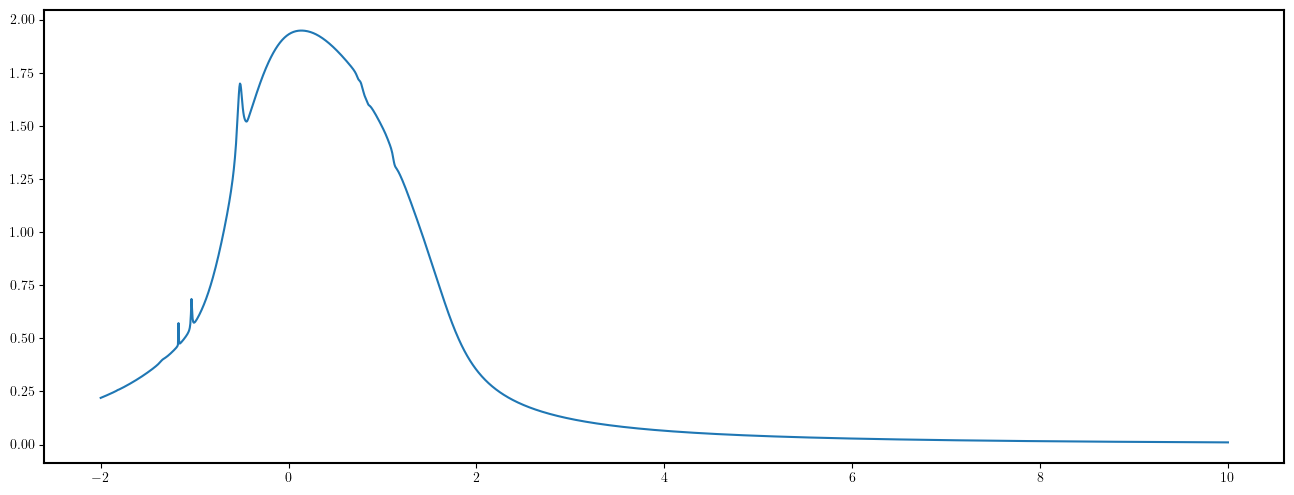

In [32]:
N = 3

wa = 2 * pi * 1e9 * 2
wb = 2 * pi * 1e9 * 0.1

Wa_initial = wa - 2* pi * 1e6 * 10000
Wa_final = wa + 2 * pi * 1e6 * 2000

g0 = 2 * wb

#Omega_a_initial = w[0] - 3 * (etaA)
#Omega_a_final = w[0]

Wa_list = linspace(Wa_initial, Wa_final, 2000)

Ea = 2 * pi * 1e6 * 1000

kappa_a = 2 * pi * 1e3 * 100
kappa_b = 2 * pi * 1e3 * 100
 
n_th_a = 0.
n_th_b = 0.01

a = tensor(destroy(N),qeye(N))
b = tensor(qeye(N), destroy(N))


y_list = []
for j in Wa_list:
    Ha = (wa - j) * a.dag() * a
    Hb = wb * b.dag() * b
    Hint = g0 * a.dag() * a * (b.dag() + b)

    Hdrive_a = Ea * (a.dag() + a)

    H = Ha + Hdrive_a + Hb + Hint

    c_ops = []
    rate = kappa_a * (1 + n_th_a)
    if rate > 0.0:
        c_ops.append(sqrt(rate) * a)

    rate = kappa_a * n_th_a
    if rate > 0.0:
        c_ops.append(sqrt(rate) * a.dag())

    rate = kappa_b * (1 + n_th_b)
    if rate > 0.0:
        c_ops.append(sqrt(rate) * b)

    rate = kappa_b * n_th_b
    if rate > 0.0:
        c_ops.append(sqrt(rate) * b.dag())

    rho_ss = steadystate(H,c_ops)

    spect = expect(a.dag() * a, rho_ss)

    y_list.append(spect)


x_list = [(wa - i)/(2 * pi * 1e9) for i in Wa_list]

fig, axes = plt.subplots(1, 1, figsize=(16, 6))

axes.plot(x_list, y_list, linestyle='-', lw = 1.5)

plt.show()



In [12]:
Wa_list

array([3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e+10,
       3.0787608e+10, 3.0787608e+10, 3.0787608e+10, 3.0787608e